# Фильтрация изображения
Под задачей "фильтрации изображений" в широком смысле понимают любые процедуры обработки изображений, при которых на вход процедуры подается (одно) растровое изображение, и на выходе также формируется растровое изображение. Такие процедуры типа (один растровый вход, один растровый выход) называют *фильтрами*.
Однако чаще под "фильтрацией" в более узком смысле понимают так называемую *помеховую фильтрацию*, или фильтрацию изображений от "шума". Задача помеховой фильтрации, сводится к тому, чтобы путем некоторой обработки наблюдаемого реального изображения как можно лучше "очистить его от шума", то есть получить изображение, наиболее близкое по своим характеристикам к исходному "незашумленному" изображению.
В данной работе расматривается фильтрация изображения от шума типа соль и перец, под которым понимают замещение значения пикселя на 0 с вероятностью p и на 1 с вероятностью q

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt

Чтение изображения

In [10]:
img_start = cv.imread('images/bad_image.jpeg')

Поворот изображения

In [11]:
(h, w, g) = img_start.shape
angle = -78
scale = 1.0
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, angle, scale)
img_rotate = cv.warpAffine(img_start, M, (w, h))

Кадрирование изображения

In [12]:
ROI = (0, 105, w, 230)
img_rotate = img_rotate[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]

Перевод изображения в модель RGB

In [13]:
invert_image = cv.cvtColor(img_rotate, cv.COLOR_BGR2RGB)

Применение медианного фильтра

In [14]:
median_image1 = cv.medianBlur(invert_image, 3)
median_image2 = cv.medianBlur(invert_image, 5)
median_image3 = cv.medianBlur(invert_image, 1)

Вывод изображений

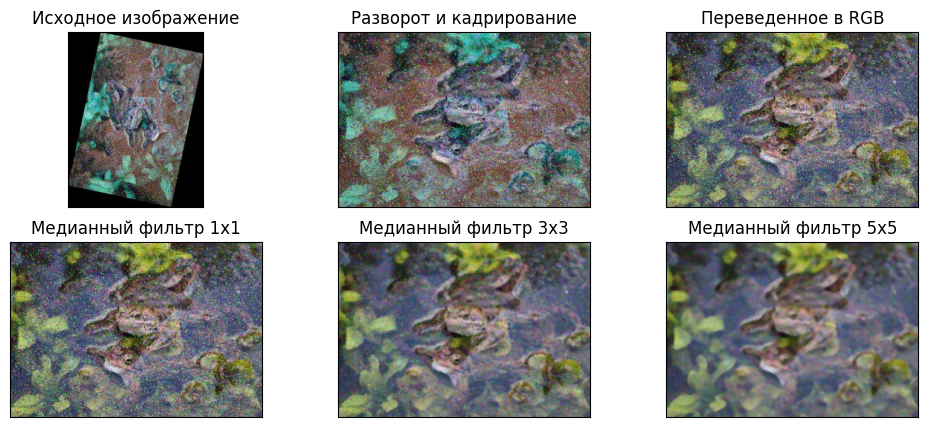

In [16]:
gs = plt.GridSpec(2, 3)
plt.figure(figsize=(12, 5))
plt.subplot(gs[0, 0]), plt.imshow(img_start)
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(gs[0, 1]), plt.imshow(img_rotate)
plt.title('Разворот и кадрирование'), plt.xticks([]), plt.yticks([])
plt.subplot(gs[0, 2]), plt.imshow(invert_image)
plt.title('Переведенное в RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(gs[1, 0]), plt.imshow(median_image3)
plt.title('Медианный фильтр 1x1'), plt.xticks([]), plt.yticks([])
plt.subplot(gs[1, 1]), plt.imshow(median_image1)
plt.title('Медианный фильтр 3x3'), plt.xticks([]), plt.yticks([])
plt.subplot(gs[1, 2]), plt.imshow(median_image2)
plt.title('Медианный фильтр 5x5'), plt.xticks([]), plt.yticks([])
plt.show()